Aleksandra Burakowska, Michał Pszenicyn

# Opis wkładu:
Razem przedyskutowaliśmy projekt i podzieliliśmy się zadaniami:
- Ola: zadania 1 i 2.
- Michał: wczytanie metadanych do zadania 1, zadania 3 i 4, formatowanie w notebooku.

Sprawdzaliśmy sobie wzajemnie nasze propozycje rozwiązań zadań.

# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X - miesiąc, oś Y - rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X - stacje, oś Y - liczba dni z przekroczeniem, kolor - rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



In [ ]:
import pandas as pd
import requests
import zipfile
import io, os

# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

# funkcja do ściągania podanego archiwum
def download_gios_archive(year, gios_id, filename):
    # Pobranie archiwum ZIP do pamięci
    url = f"{gios_archive_url}{gios_id}"
    response = requests.get(url)
    response.raise_for_status()  # jeśli błąd HTTP, zatrzymaj

    # Otwórz zip w pamięci
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # znajdź właściwy plik z PM2.5
        if not filename:
            print(f"Błąd: nie znaleziono {filename}.")
        else:
            # wczytaj plik do pandas
            with z.open(filename) as f:
                try:
                    df = pd.read_excel(f, header=None)
                except Exception as e:
                    print(f"Błąd przy wczytywaniu {year}: {e}")
    return df

# Przykladowe użycie
# df2024 = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

# Zad. 1
## Wczytanie i czyszczenie danych


In [ ]:
gios_meta_id = 584

# funkcja do ściągania metadanych
def download_gios_metadata(gios_id):
    # Pobranie pliku do pamięci
    url = f"{gios_archive_url}{gios_id}"
    response = requests.get(url)
    response.raise_for_status()  # jeśli błąd HTTP, zatrzymaj
    with io.BytesIO(response.content) as f:
        # wczytaj plik do pandas
        try:
            df = pd.read_excel(f, header=None)
        except Exception as e:
            print(f"Błąd przy wczytywaniu metadanych: {e}")
        return df

In [ ]:
df2014 = download_gios_archive(2014, gios_url_ids[2014], gios_pm25_file[2014])
df2019 = download_gios_archive(2019, gios_url_ids[2019], gios_pm25_file[2019])
df2024 = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
dfmeta = download_gios_metadata(gios_meta_id)

In [ ]:
import pandas as pd
# tutaj w tym fragmencie usuwam niepotrzebne wiersze (np. "wskaźnik")
# słownik z danymi źródłowymi (DataFrame’y)
datasets = {
    2014: df2014.copy(),
    2019: df2019.copy(),
    2024: df2024.copy()
}

cleaned = {}

for year, df in datasets.items():
    first_col = df.columns[0]

    # sprawdzamy, które wiersze to daty
    is_date = pd.to_datetime(df[first_col], errors='coerce', format='%Y-%m-%d %H:%M:%S').notna()
    # sprawdzamy, które zawierają frazę "Kod stacji"
    is_kod = df[first_col].astype(str).str.contains("Kod stacji", case=False, na=False)

    # loc bierze tylko te wiersze, które są albo kodem, albo datą
    df_clean = df.loc[is_date | is_kod].copy()
    #to nie jest konieczne, liczę tylko dla mojej informacji, żeby zobaczyć ile wierszy zostało usuniętych
    removed = len(df) - len(df_clean)
    print(f"{year}: usunięto {removed} wierszy opisowych, pozostało {len(df_clean)}")

    cleaned[year] = df_clean.reset_index(drop=True)
    #reset_index tylko dla estetyki, bo ułatwia potem łączenie i zapisywanie danych

# rozpakowanie słownika, żeby łatwo dalej używać
df2014_clean = cleaned[2014]
df2019_clean = cleaned[2019]
df2024_clean = cleaned[2024]
df2019_clean


2014: usunięto 2 wierszy opisowych, pozostało 8761
2019: usunięto 5 wierszy opisowych, pozostało 8761
2024: usunięto 5 wierszy opisowych, pozostało 8785


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,Kod stacji,DsDusznikMOB,DsJaworMOB,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpMogiNowMOB,KpToruDziewu,KpWloclOkrze,...,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmElbBazynsk,WmGoldUzdrowMOB,WmOlsPuszkin,WpKaliSawick,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczPils02
1,2019-01-01 01:00:00,33.4053,51.3878,118.773,102.09,107.061,64.1177,NaN,24.003,51.317,...,110.199,76.7306,26.3444,34.3706,14.9449,40.9183,75.2,NaN,NaN,73.935
2,2019-01-01 02:00:00,13.8028,28.4995,110.064,63.6111,55.9187,43.8401,NaN,33.6542,30.698,...,73.4132,54.4664,19.0619,23.1494,10.742,25.9358,47.9076,NaN,NaN,11.7883
3,2019-01-01 03:00:00,9.94056,11.1206,107.941,48.354,41.3488,22.8383,NaN,13.603,28.262,...,50.2355,50.4599,43.7717,21.0711,12.0391,24.5725,22.8309,5.57095,NaN,8.69917
4,2019-01-01 04:00:00,6.75889,5.57358,94.5489,34.6621,29.8697,20.1829,NaN,17.4302,26.522,...,37.5872,34.809,64.0139,21.1671,13.1849,20.6336,20.59,5.77369,NaN,5.96861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-12-31 20:00:00,18.8572,19.2339,11.9203,19.9564,10.5681,27.6,12,9.9,11.5,...,25.3449,16.615,12.1295,7.78593,NaN,2.90071,14.5322,34.8247,15.5959,19.1689
8757,2019-12-31 21:00:00,25.2719,15.621,11.8131,17.1905,8.74933,27.8,8.9,12.9,13.2,...,22.5324,12.5343,10.6563,8.00023,NaN,2.91173,13.365,30.0026,13.1825,19.7136
8758,2019-12-31 22:00:00,37.5381,12.3882,11.3933,13.2909,8.42139,18.7,8.5,4.7,15.5,...,23.8138,11.1997,13.0483,6.67999,NaN,3.0851,13.9552,27.14,14.3764,20.2439
8759,2019-12-31 23:00:00,29.0594,11.5809,9.02694,11.42,8.86111,21.1,8.4,14,10.6,...,24.4337,11.4544,11.7128,6.79077,NaN,3.75481,14.1249,24.8371,17.7941,24.7417


In [ ]:
# Zamiana wiersza "Kod stacji" na nagłówek i dodanie kolumny 'Data', żeby ujednolicić format
# potem zmapuję stare kody stacji na nowe zgodnie z metadanymi
def use_station_header(df: pd.DataFrame) -> pd.DataFrame:
    # znajdź wiersz (jego numer), który zawiera frazę "Kod stacji" w pierwszej kolumnie
    first_col = df.columns[0]
    hdr_idx = df.index[df[first_col].astype(str).str.contains("Kod stacji", case=False, na=False)]
    if len(hdr_idx) == 0:
        raise ValueError("Nie znalazłem wiersza z nagłówkiem 'Kod stacji'.")
    hdr_idx = hdr_idx[0]


    new_cols = df.iloc[hdr_idx].tolist()  # cały wiersz zawierający kody stacji zamieniam w listę (ta lista staje się nowymi nazwami kolumn)
    df2 = df.drop(index=hdr_idx).copy()  # usuwamy ten wiersz z danych (bo jest użyty już jako nagłówek)
    df2.columns = new_cols  # przypisujemy nowe nazwy kolumn

    # nazwij pierwszą kolumnę 'Data'

    df2 = df2.rename(columns={df2.columns[0]: "Data"})


    return df2.reset_index(drop=True)
df2014_hdr = use_station_header(df2014_clean)
df2014_hdr.head(10)


,Data,DsWrocWisA,KpAirpWiktorowo,KpBydgPlPozn,KpBydgWarszawska,KpTorunDziewulsk,LdLodzWIOSACzernik,LdZgierzWIOSAMielcza,LuZgoraWIOS_AUT,MpKrakowWIOSAKra6117,...,SkMalogCemen3,SkPolanRuszcz,SlGliwiGliw_mewy,SlKatowKato_kossu,SlZlotyJano_lesni,WmOlsztyWIOS_Puszkin,WpWKP001,WpWKPKalisz007/10,ZpSzczecin001,ZpSzczecin002
0,2014-01-01 01:00:00,152,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104,...,34.12,56.54,188,104,32,84.121582,56.1,NaN,105.489,109
1,2014-01-01 02:00:00,137,94.3,NaN,121.629723,NaN,210.36467,70.337502,NaN,104,...,34.61,35.93,130,107,39,75.444382,55.2,82.5,149.797,118
2,2014-01-01 03:00:00,129,102.48,NaN,59.189041,46.5652,66.425789,40.915695,NaN,91,...,33.58,34.36,138,114,43,34.427513,49.9,83,86.9602,120
3,2014-01-01 04:00:00,129,102.32,NaN,58.038334,45.8128,53.999668,37.817917,NaN,89,...,31.37,35.21,171,108,42,32.742474,52,73.1,74.8762,104
4,2014-01-01 05:00:00,105,88.73,NaN,59.658134,45.8128,52.23967,38.814861,NaN,83,...,32.27,35.54,163,88,40,32.714367,63.4,74.9,61.9866,96
5,2014-01-01 06:00:00,92,83.68,NaN,58.109863,44.4752,56.738743,40.452362,NaN,81,...,32.28,34.78,152,77,45,29.906473,61.8,77.4,51.5138,87
6,2014-01-01 07:00:00,92,93.46,62.139446,56.460609,43.5556,54.783894,40.300835,NaN,77,...,31.87,33.03,126,85,46,28.310535,53.2,80.8,58.7642,78
7,2014-01-01 08:00:00,60,95.59,NaN,56.301666,39.8772,51.07201,37.902916,NaN,74,...,35.47,31.11,111,80,36,28.712681,51.9,84.3,61.181,72
8,2014-01-01 09:00:00,44,101.42,NaN,56.918221,33.2728,46.928078,40.842361,NaN,76,...,32.4,31.38,115,87,46,24.954979,44.8,88.7,49.097,64
9,2014-01-01 10:00:00,44,106.87,NaN,56.706112,33.1056,44.203243,46.946388,NaN,77,...,26.25,34.32,89,86,44,21.300711,45.2,81.9,50.7082,56


In [ ]:
df2019_hdr = use_station_header(df2019_clean)
df2019_hdr.head(10)

,Data,DsDusznikMOB,DsJaworMOB,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpMogiNowMOB,KpToruDziewu,KpWloclOkrze,...,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmElbBazynsk,WmGoldUzdrowMOB,WmOlsPuszkin,WpKaliSawick,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczPils02
0,2019-01-01 01:00:00,33.4053,51.3878,118.773,102.09,107.061,64.1177,NaN,24.003,51.317,...,110.199,76.7306,26.3444,34.3706,14.9449,40.9183,75.2,NaN,NaN,73.935
1,2019-01-01 02:00:00,13.8028,28.4995,110.064,63.6111,55.9187,43.8401,NaN,33.6542,30.698,...,73.4132,54.4664,19.0619,23.1494,10.742,25.9358,47.9076,NaN,NaN,11.7883
2,2019-01-01 03:00:00,9.94056,11.1206,107.941,48.354,41.3488,22.8383,NaN,13.603,28.262,...,50.2355,50.4599,43.7717,21.0711,12.0391,24.5725,22.8309,5.57095,NaN,8.69917
3,2019-01-01 04:00:00,6.75889,5.57358,94.5489,34.6621,29.8697,20.1829,NaN,17.4302,26.522,...,37.5872,34.809,64.0139,21.1671,13.1849,20.6336,20.59,5.77369,NaN,5.96861
4,2019-01-01 05:00:00,7.88722,6.56224,67.88,14.287,17.6,18.7345,NaN,23.0878,24.26,...,22.6446,30.6517,43.6111,21.0774,14.0005,19.4194,27.0838,6.15494,NaN,7.80778
5,2019-01-01 06:00:00,14.4072,9.14639,5.885,10.5321,11.6,12.5788,NaN,20.259,21.737,...,18.3235,27.8605,35.3764,15.9619,13.6822,17.4122,33.3501,9.19095,NaN,8.47083
6,2019-01-01 07:00:00,7.48833,6.63053,4.44694,8.78611,14.4999,9.5613,NaN,11.4398,20.867,...,16.4331,21.3168,24.7863,8.81844,13.8957,17.1086,28.0525,9.02429,NaN,8.11528
7,2019-01-01 08:00:00,5.67083,10.0286,6.56694,9.88921,13.0059,2.6814,NaN,9.443,15.56,...,16.114,17.3735,22.7637,5.57,11.8798,16.4208,19.39,10.0724,NaN,10.9936
8,2019-01-01 09:00:00,11.7239,7.99891,6.56028,5.65181,8.6344,NaN,NaN,6.4478,11.558,...,18.1652,17.9123,15.6059,4.30889,10.1043,13.4503,17.8219,8.87795,NaN,9.54306
9,2019-01-01 10:00:00,11.7253,8.49955,7.73167,9.07378,10.9696,2.5607,NaN,6.8638,8.252,...,14.3178,18.046,18.4247,4.27111,6.83593,7.70861,9.00826,8.24201,NaN,8.25139


In [ ]:
df2024_hdr = use_station_header(df2024_clean)
df2024_hdr.head(10)

,Data,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
0,2024-01-01 01:00:00,NaN,30.8,53.5,NaN,94,58.3,28.5,110.9,96.8,...,48.6,37.4,69.9,90.2,41.3,67.9,26.5,63.9,49.9,57.6
1,2024-01-01 02:00:00,NaN,30.2,61.3,NaN,44.8,44.8,73.9,39.5,37,...,12.8,18.8,57.1,55.4,38.4,88.7,26.8,33.5,15.4,24.6
2,2024-01-01 03:00:00,NaN,22.4,56.1,NaN,20.2,30.5,66.5,39.6,43.6,...,11,19,56,46.1,25.8,84.6,24.9,32.9,14.3,21.7
3,2024-01-01 04:00:00,NaN,11.2,27.6,NaN,14.7,18.5,66.8,36.2,42.6,...,10,18.7,44.1,26.9,16.3,75.8,26.4,32.6,17,20.1
4,2024-01-01 05:00:00,NaN,22.5,25.8,NaN,17.2,18,58.4,35.6,41.4,...,8.4,19,40.5,22.2,12.6,50.8,28.7,31,27.2,19.7
5,2024-01-01 06:00:00,NaN,8.1,21.7,NaN,18.3,13.2,NaN,37.3,39.8,...,8.9,20.3,27.7,24.5,10.6,35,31.1,30.5,22,23.3
6,2024-01-01 07:00:00,NaN,7.1,18.7,NaN,14.5,14.6,41.4,40.9,39.5,...,8.3,20.9,28.7,26.4,9.9,36.8,31.9,28.8,16.4,20.6
7,2024-01-01 08:00:00,NaN,11.6,8.5,NaN,12.7,12.4,38.9,42.4,43.5,...,7.3,21.9,31.1,31.2,9,26.8,31.6,27,13.1,20
8,2024-01-01 09:00:00,NaN,14.2,8.4,NaN,10.1,11.5,NaN,44.5,56.7,...,7.7,23.6,29.5,24.8,8.5,27.6,31.8,26.1,12.4,18.7
9,2024-01-01 10:00:00,NaN,14.6,11.3,NaN,11.5,11.5,NaN,56.3,64.7,...,8.6,20.9,21.6,22,8.5,24.5,31,25.2,13,18.6


In [ ]:
# Słownik stary_kod -> nowy_kod z metadanych
# mapuję stare kody stacji na nowe, potem podmienię je zgodnie ze słownikiem który ta funkcja tworzy
def build_old2new(dfmeta_raw: pd.DataFrame) -> dict:
    # w metadanych pierwszy wiersz to nazwy kolumn (wyciągamy ten pierwszy wiersz jako nagłówki, wycinamy go z danych i resetujemy indeks) teraz m będzie miało poprawne nazwy kolumn
    m = dfmeta_raw.copy()
    m.columns = m.iloc[0]
    m = m[1:].reset_index(drop=True)

    # złap nazwy kolumn niezależnie od spacji/enterów
    def pick(col_starts):
        for c in m.columns:
            if str(c).strip().lower().startswith(col_starts):
                return c
        raise KeyError(f"Brak kolumny zaczynającej się od: {col_starts}")

    col_new = pick("kod stacji")                           # np. "Kod stacji"
    col_old = pick("stary kod stacji")                     # np. "Stary Kod stacji \n(o ile inny od aktualnego)"
    # m2 To czysta tabelka 2-kolumnowa: (stary_kod, nowy_kod), bez pustych wierszy, z danymi jako tekst, to na niej tworzony jest słownik
    m2 = m[[col_old, col_new]].dropna(subset=[col_old, col_new]).astype(str)

    # usuń spacje z początku i końca tekstu w obu kolumnach
    m2[col_old] = m2[col_old].str.strip()
    m2[col_new] = m2[col_new].str.strip()

    # stwórz słownik: stary_kod -> nowy_kod
    d = m2.set_index(col_old)[col_new].to_dict()
    return d

old2new = build_old2new(dfmeta)
old2new

{'DsBogatMob': 'DsBogatFrancMOB',
 'DsCzer02': 'DsCzerStraza',
 'DsDzia01': 'DsDzialoszyn',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsJeleniaGoraA': 'DsJelGorOgin',
 'DsJeleniaGoraPM': 'DsJelGorSoko',
 'DsKlodzkoA': 'DsKlodzSzkol',
 'DsZabkowSemi': 'DsZabkPowWar',
 '': 'ZpSwinBialorMOB',
 'DsPolanZdrojMOB': 'DsKudSlon',
 'DsLegRzeczA': 'DsLegPolarna',
 'DsNRudaSrebP': 'DsNowRudSreb',
 'DsOlawaSemi': 'DsOlawZolnAK',
 'DsOlesnicaPM': 'DsOlesBrzozo',
 'DsOsieczow': 'DsOsieczow21',
 'DsPolkKasz': 'DsPolKasztan',
 'DsSniezka': 'DsSniezkaObs',
 'DsSwidMob': 'DsSwidnMarciMOB',
 'DsSwidRynek': 'DsSwidnRynek',
 'DsSzczDZPM': 'DsSzczaKolej',
 'DsTrzebnica': 'DsTrzebniMaj',
 'DsWalbWysA': 'DsWalbrzWyso',
 'DsWrocWisA': 'DsWrocAlWisn',
 'DsWrocBartA': 'DsWrocBartni',
 'DsWrocGrobla': 'DsWrocNaGrob',
 'DsWrocKorzA': 'DsWrocWybCon',
 'DsZgorzBohA': 'DsZgorBohGet',
 'DsZlotoryjaPM': 'DsZlotoStasz',
 'KpBrodnicaKochanowskiego': 'KpBrodKochan',
 'KpBydgBerlinga, KpBydBerling':

#### Duplikaty kolumn:
Po zmianie nazw kolumn mogłoby sie zdarzyć, że dwie różne stare nazwy dostaną ten sam nowy kod (np. stacja miała kilka historycznych nazw). Wtedy w DataFrame powstaną dwie kolumny o tej samej nazwie (warto na wszelki wypadek sprawdzić, czy nie ma duplikatów) - ja sprawdziłam i nie ma.

In [ ]:
def mapuj_kolumny_z_podgladem(df: pd.DataFrame, mapa: dict) -> pd.DataFrame:
    """
    Zmienia nazwy kolumn na podstawie słownika 'mapa' (stary_kod → nowy_kod).
    Przy okazji wypisuje te kolumny, które zostały przemianowane - dla podglądu, informacji czy coś się zmieniło
    """
    rename_pairs = {}
    for col in df.columns:
        new_name = mapa.get(str(col).strip())
        if new_name and new_name != col:
            rename_pairs[col] = new_name

    # wypisz zmiany
    if rename_pairs:
        print(" Zmienione kolumny:")
        for old, new in rename_pairs.items():
            print(f"   {old}  →  {new}")

    else:
        print(" Żadna kolumna nie wymagała zmiany.")

    # faktyczna zmiana nazw kolumn
    return df.rename(columns=lambda c: mapa.get(str(c).strip(), c))
df2014_mapped = mapuj_kolumny_z_podgladem(df2014_hdr, old2new)



 Zmienione kolumny:
   DsWrocWisA  →  DsWrocAlWisn
   KpAirpWiktorowo  →  KpWiktorowoG
   KpBydgPlPozn  →  KpBydPlPozna
   KpBydgWarszawska  →  KpBydWarszaw
   KpTorunDziewulsk  →  KpToruDziewu
   LdLodzWIOSACzernik  →  LdLodzCzerni
   LdZgierzWIOSAMielcza  →  LdZgieMielcz
   LuZgoraWIOS_AUT  →  LuZielKrotka
   MpKrakowWIOSAKra6117  →  MpKrakAlKras
   MpKrakowWIOSBuja6119  →  MpKrakBujaka
   MpKrakowWIOSBulw6118  →  MpKrakBulwar
   MzLegionZegIMGW  →  MzLegZegrzyn
   MzPlockReja  →  MzPlocMiReja
   MzRadomTochter  →  MzRadTochter
   MzSiedlceKonar  →  MzSiedKonars
   MzWarNiepodKom  →  MzWarAlNiepo
   MzWarszUrsynow  →  MzWarWokalna
   MzZyrardRoosevel  →  MzZyraRoosev
   OpKkozle1a  →  OpKKozBSmial
   PdBialyMiejska  →  PdBialWaszyn
   PkPrzemyslWIOSGrunw  →  PkPrzemGrunw
   SkKielJagielWios  →  SkKielJagiel
   SkMalogCemen3  →  SkMalo11List
   SkPolanRuszcz  →  SkPolaRuszcz
   SlGliwiGliw_mewy  →  SlGliwicMewy
   SlKatowKato_kossu  →  SlKatoKossut
   SlZlotyJano_lesni  →  SlZlotPotLe

In [ ]:
df2019_mapped = mapuj_kolumny_z_podgladem(df2019_hdr, old2new)

 Zmienione kolumny:
   MzKonJezMos  →  MzKonJezWieMOB
   PdBialWaszyn  →  PdBialUpalna
   PdSuwPulaskp  →  PdSuwPulask2


In [ ]:
df2024_mapped = mapuj_kolumny_z_podgladem(df2024_hdr, old2new)

 Żadna kolumna nie wymagała zmiany.


In [ ]:
# zostawienie tylko kolumn występujących we wszystkich 3 latach
# zbieram najpierw nazwy kolumn z 3 plików i zapisuję je w listach
cols2014 = [c for c in df2014_mapped.columns if c != "Data"]
cols2019 = [c for c in df2019_mapped.columns if c != "Data"]
cols2024 = [c for c in df2024_mapped.columns if c != "Data"]
# szukam przecięcia 3 zbiorów (dlatego listy przerabiam na zbiory), sorted dla porządku alfabetycznego
common_stations = sorted(set(cols2014) & set(cols2019) & set(cols2024))




In [ ]:
# tworzę nową tabelę z 2014 roku - z kolumną data i nowymi nazwami tylko tych stacji, które występują we wszystkich trzech latach (odpowiednio dla 2019 i 2024 roku)
df2014_common3 = df2014_mapped[["Data"] + common_stations].copy()
df2014_common3

,Data,DsWrocAlWisn,KpBydPlPozna,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,MpKrakBulwar,MzLegZegrzyn,MzPlocMiReja,...,MzSiedKonars,MzWarAlNiepo,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick
0,2014-01-01 01:00:00,152,116.214424,81.029259,119.696114,NaN,104,64,44.44,NaN,...,28.24,100.325798,63.49,NaN,115,48.175,104,32,84.121582,NaN
1,2014-01-01 02:00:00,137,NaN,210.36467,70.337502,NaN,104,63,103.07,NaN,...,19.63,69.41243,36.28,NaN,134,33.747,107,39,75.444382,82.5
2,2014-01-01 03:00:00,129,NaN,66.425789,40.915695,NaN,91,62,74.91,NaN,...,15.39,40.967861,30.77,NaN,137,30.622,114,43,34.427513,83
3,2014-01-01 04:00:00,129,NaN,53.999668,37.817917,NaN,89,58,39.27,NaN,...,15.27,37.308937,31.69,NaN,137,28.642,108,42,32.742474,73.1
4,2014-01-01 05:00:00,105,NaN,52.23967,38.814861,NaN,83,55,26.51,NaN,...,17.45,38.185955,36.86,NaN,136,27.781,88,40,32.714367,74.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2014-12-31 20:00:00,52,20,67.56,78.434807,97.021,118,53,63.47,45.35,...,53.62,59.8858,49.37,78.88,40,22.064,29,50,44.658291,52.6
8756,2014-12-31 21:00:00,53,15.6,64.9,68.647339,23.842,99,59,75.57,40.99,...,56.83,60.2082,48.22,78.3,39,20.4803,25,45,39.835423,60.4
8757,2014-12-31 22:00:00,48,14.1,64.2,57.358459,20.4708,90,59,67.98,38.46,...,55.46,58.838,48.45,76.35,42,22.4535,24,44,34.202221,57.5
8758,2014-12-31 23:00:00,54,13.2,54.47,51.250973,20.6976,90,59,56.98,35.94,...,52.47,56.823,47.99,71.3,46,20.1425,29,44,26.227037,43.6


In [ ]:
df2019_common3 = df2019_mapped[["Data"] + common_stations].copy()
df2019_common3


,Data,DsWrocAlWisn,KpBydPlPozna,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,MpKrakBulwar,MzLegZegrzyn,MzPlocMiReja,...,MzSiedKonars,MzWarAlNiepo,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick
0,2019-01-01 01:00:00,102.09,64.1177,58.045,61.832,43.7691,64.0752,61.8134,46.795909,34.271411,...,61.2,64.121607,42.034031,42.381466,60.705,47.6,76.7306,26.3444,40.9183,75.2
1,2019-01-01 02:00:00,63.6111,43.8401,32.032,41.882,10.8958,69.0186,57.056,26.420152,27.76813,...,33.83,44.747658,31.087669,25.506146,33.3039,33,54.4664,19.0619,25.9358,47.9076
2,2019-01-01 03:00:00,48.354,22.8383,24.856,23.357,9.41853,61.7894,44.5697,26.544394,26.310498,...,27.28,32.867405,23.715629,19.244234,26.522,23.6,50.4599,43.7717,24.5725,22.8309
3,2019-01-01 04:00:00,34.6621,20.1829,24.856,20.507,17.2498,51.4691,31.2757,26.792879,21.376974,...,23.74,25.830641,18.912633,17.864491,29.0648,20.2,34.809,64.0139,20.6336,20.59
4,2019-01-01 05:00:00,14.287,18.7345,24.856,19.082,24.0884,36.2845,24.1471,22.320152,21.937602,...,20.21,25.830641,18.465843,17.864491,22.4872,18.6,30.6517,43.6111,19.4194,27.0838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 20:00:00,19.9564,27.6,9,18,11.2759,27.1021,26.04,10.889848,8.54,...,5.7,12.396817,6.402505,6.28,14.0384,20.4,16.615,12.1295,2.90071,14.5322
8756,2019-12-31 21:00:00,17.1905,27.8,10,13,10.426,24.9419,21.323,4.677727,10.15,...,7.03,13.493456,6.6259,7.66,14.7582,17.7,12.5343,10.6563,2.91173,13.365
8757,2019-12-31 22:00:00,13.2909,18.7,9,14,8.03712,25.6384,23.1337,6.665606,10.71,...,7.98,10.751859,5.062134,7.24,17.3697,16.8,11.1997,13.0483,3.0851,13.9552
8758,2019-12-31 23:00:00,11.42,21.1,9,18,49.1439,22.5507,22.6668,9.523182,13.77,...,4.56,10.294926,5.285529,7.89,20.1091,16.6,11.4544,11.7128,3.75481,14.1249


In [ ]:
df2024_common3 = df2024_mapped[["Data"] + common_stations].copy()
df2024_common3

,Data,DsWrocAlWisn,KpBydPlPozna,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,MpKrakBulwar,MzLegZegrzyn,MzPlocMiReja,...,MzSiedKonars,MzWarAlNiepo,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick
0,2024-01-01 01:00:00,94,28.5,43.2,68.4,38.3,68.6,42.1,45.7,59.9,...,38.2,39.8,44.8,65.6,48.1,10.4,75.8,25.2,37.4,69.9
1,2024-01-01 02:00:00,44.8,73.9,39.2,66.1,13.6,57.4,53,40.4,35.1,...,21.9,38.6,39.9,37.7,22,9.8,92.5,22.5,18.8,57.1
2,2024-01-01 03:00:00,20.2,66.5,39.2,49.2,15.9,56.3,71.7,44.1,35.3,...,19.9,31.5,33.2,38.4,21.6,12.1,100.6,28.8,19,56
3,2024-01-01 04:00:00,14.7,66.8,40.2,40.6,13.4,66.1,72.7,38.6,35.4,...,23.2,29.7,30.9,35.6,23.8,14.5,60.5,31.6,18.7,44.1
4,2024-01-01 05:00:00,17.2,58.4,40.2,40.7,13.1,63.7,67.6,33,37.6,...,21,29.3,29.4,33.1,27.9,16.8,60,22.5,19,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31 20:00:00,51.4,5.4,33.3,49.5,15.9,57,43.2,22.2,33,...,NaN,27.2,27.5,27.3,18.6,19.7,20.3,23.8,16,25.4
8780,2024-12-31 21:00:00,65.5,7.7,34,48.7,16.1,58.7,54.1,34.5,29.4,...,NaN,32.3,32,29.4,22.9,19.3,20.1,28.4,19.3,25
8781,2024-12-31 22:00:00,30.2,14.5,31.7,48.1,15.9,67.9,55.8,32.2,29.3,...,NaN,38.9,32.6,30.4,25.6,17.4,27.3,22.5,26.9,24
8782,2024-12-31 23:00:00,36,NaN,26.8,38.4,12.5,75.3,69.5,30.8,27.9,...,NaN,34.1,33,30.5,27.8,15.1,26.4,25.3,23,23.6


In [ ]:
# informację o miejscowości do każdej stacji pomiarowej, tak aby kolumny miały nie tylko kod stacji ale i miejscowość. Na podstawie metadanych tworzę słownik: {kod_stacji: miejscowość}

# utwórz mapę: kod stacji → miejscowość
meta = dfmeta.copy()
meta.columns = meta.iloc[0]  # pierwszy wiersz to nagłówki
meta = meta[1:].reset_index(drop=True)

# znajdź nazwy kolumn
col_code = [c for c in meta.columns if "Kod stacji" in str(c)][0]
col_city = [c for c in meta.columns if "Miejscowość" in str(c)][0]

# zbuduj słownik
kod2miasto = (
    meta[[col_code, col_city]]  # wybieramy tylko kolumny kod stacji i miejscowość
    .dropna(subset=[col_code, col_city])   # Usuwa wiersze, które mają pustą wartość (NaN) w tych kolumnach.
    .astype(str)   # Konwertuje wszystko na stringi
    .set_index(col_code)[col_city] # Ustawia kolumnę „Kod stacji” jako indeks, a następnie wybiera kolumnę „Miejscowość”.
    .to_dict() # potem zamienia te dane na słownik
)
kod2miasto

{'DsBialka': 'Białka',
 'DsBielGrot': 'Bielawa',
 'DsBogatFrancMOB': 'Bogatynia',
 'DsBogChop': 'Bogatynia',
 'DsBogZatonieMob': 'Bogatynia',
 'DsBoleslaMOB': 'Bolesławiec',
 'DsBrzegGlog': 'Brzeg Głogowski',
 'DsChojnowKil': 'Chojnów',
 'DsChojnowMalMOB': 'Chojnów',
 'DsCzar07': 'Czarna Góra',
 'DsCzerStraza': 'Czerniawa',
 'DsCzLasMob': 'Czarny Las',
 'DsDusznikMOB': 'Duszniki-Zdrój',
 'DsDuszZiel': 'Duszniki-Zdrój',
 'DsDzialoszyn': 'Działoszyn',
 'DsDziePilsud': 'Dzierżoniów',
 'DsDzierKras': 'Dzierżoniów',
 'DsGlogMob': 'Głogów',
 'DsGlogNorw': 'Głogów',
 'DsGlogNorwArch': 'Głogów',
 'DsGlogOrzech': 'Głogów',
 'DsGlogowko': 'Głogówko',
 'DsGlogSikor': 'Głogów',
 'DsGlogWiStwo': 'Głogów',
 'DsGrodziec': 'Grodziec Mały',
 'DsJasnaSport': 'Jasna Góra',
 'DsJawDmow': 'Jawor',
 'DsJaworMOB': 'Jawor',
 'DsJedlinaZdrMOB': 'Jedlina-Zdrój',
 'DsJedlZdroj': 'Jedlina-Zdrój',
 'DsJelGorOgin': 'Jelenia Góra',
 'DsJelGorSoko': 'Jelenia Góra',
 'DsJelw05': 'Jeleniów',
 'DsJgCiep': 'Jelenia Góra'

In [ ]:
# MultiIndex to po prostu wielopoziomowy indeks — czyli taki, gdzie:
# każda kolumna (lub wiersz) ma kilka warstw etykiet zamiast jednej.
# dodaję multiindeks korzystając ze słownika który utworzyłam wcześniej
import pandas as pd

def dodaj_multiindex(df: pd.DataFrame, mapa_kod_miasto: dict) -> pd.DataFrame:
    """
    Dodaje MultiIndex do kolumn: (Miejscowość, Kod stacji).
    Jeśli DataFrame ma już MultiIndex w kolumnach - zwraca go bez zmian.
    """
    # jeśli kolumny są już MultiIndex, nie ruszamy
    if isinstance(df.columns, pd.MultiIndex):
        print("Kolumny już mają MultiIndex - nic nie zmieniam.")
        return df

    nowe_kolumny = []
    for col in df.columns:
        if str(col).lower() == "data":
            # kolumna z datą - osobny poziom 'Data'
            nowe_kolumny.append(("", "Data"))
        else:
            miasto = mapa_kod_miasto.get(col, "Nieznane")
            nowe_kolumny.append((miasto, col))

    df2 = df.copy()
    df2.columns = pd.MultiIndex.from_tuples(nowe_kolumny,
                                            names=["Miejscowość", "Kod stacji"])
    return df2
df2014_multi = dodaj_multiindex(df2014_common3, kod2miasto)
df2014_multi

Miejscowość                           Wrocław    Bydgoszcz         Łódź  \
Kod stacji                  Data DsWrocAlWisn KpBydPlPozna LdLodzCzerni   
0            2014-01-01 01:00:00          152   116.214424    81.029259   
1            2014-01-01 02:00:00          137          NaN    210.36467   
2            2014-01-01 03:00:00          129          NaN    66.425789   
3            2014-01-01 04:00:00          129          NaN    53.999668   
4            2014-01-01 05:00:00          105          NaN     52.23967   
...                          ...          ...          ...          ...   
8755         2014-12-31 20:00:00           52           20        67.56   
8756         2014-12-31 21:00:00           53         15.6         64.9   
8757         2014-12-31 22:00:00           48         14.1         64.2   
8758         2014-12-31 23:00:00           54         13.2        54.47   
8759         2015-01-01 00:00:00           44         14.3        60.48   

Miejscowość       Zgierz Zielona Góra       Kraków                 Legionowo  \
Kod stacji  LdZgieMielcz LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
0             119.696114          NaN          104           64        44.44   
1              70.337502          NaN          104           63       103.07   
2              40.915695          NaN           91           62        74.91   
3              37.817917          NaN           89           58        39.27   
4              38.814861          NaN           83           55        26.51   
...                  ...          ...          ...          ...          ...   
8755           78.434807       97.021          118           53        63.47   
8756           68.647339       23.842           99           59        75.57   
8757           57.358459      20.4708           90           59        67.98   
8758           51.250973      20.6976           90           59        56.98   
8759           45.191982      18.0532           89           65        55.44   

Miejscowość        Płock  ...      Siedlce     Warszawa               \
Kod stacji  MzPlocMiReja  ... MzSiedKonars MzWarAlNiepo MzWarWokalna   
0                    NaN  ...        28.24   100.325798        63.49   
1                    NaN  ...        19.63     69.41243        36.28   
2                    NaN  ...        15.39    40.967861        30.77   
3                    NaN  ...        15.27    37.308937        31.69   
4                    NaN  ...        17.45    38.185955        36.86   
...                  ...  ...          ...          ...          ...   
8755               45.35  ...        53.62      59.8858        49.37   
8756               40.99  ...        56.83      60.2082        48.22   
8757               38.46  ...        55.46       58.838        48.45   
8758               35.94  ...        52.47       56.823        47.99   
8759                33.3  ...        50.29      51.5034        51.32   

Miejscowość     Żyrardów Kędzierzyn-Koźle     Przemyśl     Katowice  \
Kod stacji  MzZyraRoosev     OpKKozBSmial PkPrzemGrunw SlKatoKossut   
0                    NaN              115       48.175          104   
1                    NaN              134       33.747          107   
2                    NaN              137       30.622          114   
3                    NaN              137       28.642          108   
4                    NaN              136       27.781           88   
...                  ...              ...          ...          ...   
8755               78.88               40       22.064           29   
8756                78.3               39      20.4803           25   
8757               76.35               42      22.4535           24   
8758                71.3               46      20.1425           29   
8759               60.16               46      19.5413           29   

Miejscowość  Złoty Potok      Olsztyn       Kalisz  
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick  
0               

In [ ]:
df2019_multi = dodaj_multiindex(df2019_common3, kod2miasto)
df2019_multi

Miejscowość                           Wrocław    Bydgoszcz         Łódź  \
Kod stacji                  Data DsWrocAlWisn KpBydPlPozna LdLodzCzerni   
0            2019-01-01 01:00:00       102.09      64.1177       58.045   
1            2019-01-01 02:00:00      63.6111      43.8401       32.032   
2            2019-01-01 03:00:00       48.354      22.8383       24.856   
3            2019-01-01 04:00:00      34.6621      20.1829       24.856   
4            2019-01-01 05:00:00       14.287      18.7345       24.856   
...                          ...          ...          ...          ...   
8755         2019-12-31 20:00:00      19.9564         27.6            9   
8756         2019-12-31 21:00:00      17.1905         27.8           10   
8757         2019-12-31 22:00:00      13.2909         18.7            9   
8758         2019-12-31 23:00:00        11.42         21.1            9   
8759         2020-01-01 00:00:00      11.4764         17.8            9   

Miejscowość       Zgierz Zielona Góra       Kraków                 Legionowo  \
Kod stacji  LdZgieMielcz LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
0                 61.832      43.7691      64.0752      61.8134    46.795909   
1                 41.882      10.8958      69.0186       57.056    26.420152   
2                 23.357      9.41853      61.7894      44.5697    26.544394   
3                 20.507      17.2498      51.4691      31.2757    26.792879   
4                 19.082      24.0884      36.2845      24.1471    22.320152   
...                  ...          ...          ...          ...          ...   
8755                  18      11.2759      27.1021        26.04    10.889848   
8756                  13       10.426      24.9419       21.323     4.677727   
8757                  14      8.03712      25.6384      23.1337     6.665606   
8758                  18      49.1439      22.5507      22.6668     9.523182   
8759                  18      17.4649        16.47      18.0989    10.268636   

Miejscowość        Płock  ...      Siedlce     Warszawa               \
Kod stacji  MzPlocMiReja  ... MzSiedKonars MzWarAlNiepo MzWarWokalna   
0              34.271411  ...         61.2    64.121607    42.034031   
1               27.76813  ...        33.83    44.747658    31.087669   
2              26.310498  ...        27.28    32.867405    23.715629   
3              21.376974  ...        23.74    25.830641    18.912633   
4              21.937602  ...        20.21    25.830641    18.465843   
...                  ...  ...          ...          ...          ...   
8755                8.54  ...          5.7    12.396817     6.402505   
8756               10.15  ...         7.03    13.493456       6.6259   
8757               10.71  ...         7.98    10.751859     5.062134   
8758               13.77  ...         4.56    10.294926     5.285529   
8759               16.76  ...         3.99    11.848498     6.737598   

Miejscowość     Żyrardów Kędzierzyn-Koźle     Przemyśl     Katowice  \
Kod stacji  MzZyraRoosev     OpKKozBSmial PkPrzemGrunw SlKatoKossut   
0              42.381466           60.705         47.6      76.7306   
1              25.506146          33.3039           33      54.4664   
2              19.244234           26.522         23.6      50.4599   
3              17.864491          29.0648         20.2       34.809   
4              17.864491          22.4872         18.6      30.6517   
...                  ...              ...          ...          ...   
8755                6.28          14.0384         20.4       16.615   
8756                7.66          14.7582         17.7      12.5343   
8757                7.24          17.3697         16.8      11.1997   
8758                7.89          20.1091         16.6      11.4544   
8759                8.01           12.258         18.7      12.0104   

Miejscowość  Złoty Potok      Olsztyn       Kalisz  
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick  
0               

In [ ]:
df2024_multi = dodaj_multiindex(df2024_common3, kod2miasto)
df2024_multi

Miejscowość                           Wrocław    Bydgoszcz         Łódź  \
Kod stacji                  Data DsWrocAlWisn KpBydPlPozna LdLodzCzerni   
0            2024-01-01 01:00:00           94         28.5         43.2   
1            2024-01-01 02:00:00         44.8         73.9         39.2   
2            2024-01-01 03:00:00         20.2         66.5         39.2   
3            2024-01-01 04:00:00         14.7         66.8         40.2   
4            2024-01-01 05:00:00         17.2         58.4         40.2   
...                          ...          ...          ...          ...   
8779         2024-12-31 20:00:00         51.4          5.4         33.3   
8780         2024-12-31 21:00:00         65.5          7.7           34   
8781         2024-12-31 22:00:00         30.2         14.5         31.7   
8782         2024-12-31 23:00:00           36          NaN         26.8   
8783         2025-01-01 00:00:00         50.4         15.7         37.3   

Miejscowość       Zgierz Zielona Góra       Kraków                 Legionowo  \
Kod stacji  LdZgieMielcz LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
0                   68.4         38.3         68.6         42.1         45.7   
1                   66.1         13.6         57.4           53         40.4   
2                   49.2         15.9         56.3         71.7         44.1   
3                   40.6         13.4         66.1         72.7         38.6   
4                   40.7         13.1         63.7         67.6           33   
...                  ...          ...          ...          ...          ...   
8779                49.5         15.9           57         43.2         22.2   
8780                48.7         16.1         58.7         54.1         34.5   
8781                48.1         15.9         67.9         55.8         32.2   
8782                38.4         12.5         75.3         69.5         30.8   
8783                45.5         14.7         75.5         72.6         30.3   

Miejscowość        Płock  ...      Siedlce     Warszawa               \
Kod stacji  MzPlocMiReja  ... MzSiedKonars MzWarAlNiepo MzWarWokalna   
0                   59.9  ...         38.2         39.8         44.8   
1                   35.1  ...         21.9         38.6         39.9   
2                   35.3  ...         19.9         31.5         33.2   
3                   35.4  ...         23.2         29.7         30.9   
4                   37.6  ...           21         29.3         29.4   
...                  ...  ...          ...          ...          ...   
8779                  33  ...          NaN         27.2         27.5   
8780                29.4  ...          NaN         32.3           32   
8781                29.3  ...          NaN         38.9         32.6   
8782                27.9  ...          NaN         34.1           33   
8783                25.5  ...          NaN         32.4         29.9   

Miejscowość     Żyrardów Kędzierzyn-Koźle     Przemyśl     Katowice  \
Kod stacji  MzZyraRoosev     OpKKozBSmial PkPrzemGrunw SlKatoKossut   
0                   65.6             48.1         10.4         75.8   
1                   37.7               22          9.8         92.5   
2                   38.4             21.6         12.1        100.6   
3                   35.6             23.8         14.5         60.5   
4                   33.1             27.9         16.8           60   
...                  ...              ...          ...          ...   
8779                27.3             18.6         19.7         20.3   
8780                29.4             22.9         19.3         20.1   
8781                30.4             25.6         17.4         27.3   
8782                30.5             27.8         15.1         26.4   
8783                27.9             23.6         15.1           27   

Miejscowość  Złoty Potok      Olsztyn       Kalisz  
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick  
0               

In [ ]:
import pandas as pd

def ensure_datetime(df: pd.DataFrame) -> pd.DataFrame:
    """
    Konwertuje kolumnę z datą na datetime64 w znanym formacie '%Y-%m-%d %H:%M:%S'.
    Działa zarówno dla zwykłych kolumn, jak i MultiIndex.
    """
    df = df.copy()

    # znajdź kolumnę z datą
    date_col = None
    if isinstance(df.columns, pd.MultiIndex):
        for c in df.columns:
            if any(str(x).strip().lower() in ("data", "date", "czas") for x in (c if isinstance(c, tuple) else [c])):
                date_col = c
                break
    else:
        for c in df.columns:
            if str(c).strip().lower() in ("data", "date", "czas"):
                date_col = c
                break

    if date_col is None:
        raise ValueError("Nie znaleziono kolumny z datą.")

    # szybka konwersja z określonym formatem
    df[date_col] = pd.to_datetime(df[date_col], format="%Y-%m-%d %H:%M:%S", errors="coerce")

    n_na = df[date_col].isna().sum()
    print(f"Kolumna {date_col} przekonwertowana na datetime (błędne wartości: {n_na})")

    return df
df2014_dt = ensure_datetime(df2014_common3)
df2019_dt = ensure_datetime(df2019_common3)
df2024_dt = ensure_datetime(df2024_common3)


Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)


In [ ]:
from datetime import time

def shift_midnight_to_prev_day(df: pd.DataFrame) -> pd.DataFrame:
    out = ensure_datetime(df)
    # znajdź kolumnę daty ponownie
    date_col = next(c for c in out.columns if ("data" in str(c).lower() or "date" in str(c).lower() or "czas" in str(c).lower()))
    m = out[date_col].dt.time == time(0, 0, 0)

    out.loc[m, date_col] = out.loc[m, date_col] - pd.Timedelta(seconds=1)
    #print(out.loc[m, date_col])  #tu faktycznie zobaczyłam przesunięcie daty
    #print(f"Przesunięto {int(m.sum())} wierszy z 00:00:00 na poprzedni dzień.")
    return out
df2014_shift = shift_midnight_to_prev_day(df2014_common3)
df2019_shift = shift_midnight_to_prev_day(df2019_common3)
df2024_shift= shift_midnight_to_prev_day(df2024_common3)

Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)


In [ ]:
# sprawdzam które lata były przestępne, żeby mieć pewność że poprawną liczbę pomiarów z północy przerobił na poprzedni dzień
import calendar
print(calendar.isleap(2014))  # False
print(calendar.isleap(2019))  # False
print(calendar.isleap(2024))  # True


False
False
True


In [ ]:
import pandas as pd

# 1.dodaj kolumnę "Rok" do każdego DataFrame
df2014_shift["Rok"] = 2014
df2019_shift["Rok"] = 2019
df2024_shift["Rok"] = 2024

# 2. połącz wszystko w jeden DataFrame
df_all = pd.concat([df2014_shift, df2019_shift, df2024_shift], ignore_index=True)

# 3. upewnij się, że kolumna z datą jest typu datetime (na wszelki wypadek)
#date_col = next(c for c in df_all.columns if "data" in str(c).lower() or "czas" in str(c).lower())
#df_all[date_col] = pd.to_datetime(df_all[date_col], errors="coerce")

# 4. sprawdzenie

df_all.head(10)

,Data,DsWrocAlWisn,KpBydPlPozna,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,MpKrakBulwar,MzLegZegrzyn,MzPlocMiReja,...,MzWarAlNiepo,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,Rok
0,2014-01-01 01:00:00,152,116.214424,81.029259,119.696114,NaN,104,64,44.44,NaN,...,100.325798,63.49,NaN,115,48.175,104,32,84.121582,NaN,2014
1,2014-01-01 02:00:00,137,NaN,210.36467,70.337502,NaN,104,63,103.07,NaN,...,69.41243,36.28,NaN,134,33.747,107,39,75.444382,82.5,2014
2,2014-01-01 03:00:00,129,NaN,66.425789,40.915695,NaN,91,62,74.91,NaN,...,40.967861,30.77,NaN,137,30.622,114,43,34.427513,83,2014
3,2014-01-01 04:00:00,129,NaN,53.999668,37.817917,NaN,89,58,39.27,NaN,...,37.308937,31.69,NaN,137,28.642,108,42,32.742474,73.1,2014
4,2014-01-01 05:00:00,105,NaN,52.23967,38.814861,NaN,83,55,26.51,NaN,...,38.185955,36.86,NaN,136,27.781,88,40,32.714367,74.9,2014
5,2014-01-01 06:00:00,92,NaN,56.738743,40.452362,NaN,81,54,28.27,NaN,...,36.873173,34.44,NaN,142,27.774,77,45,29.906473,77.4,2014
6,2014-01-01 07:00:00,92,62.139446,54.783894,40.300835,NaN,77,49,26.29,NaN,...,35.300701,27.33,NaN,146,28.713,85,46,28.310535,80.8,2014
7,2014-01-01 08:00:00,60,NaN,51.07201,37.902916,NaN,74,47,29.81,NaN,...,28.995245,24.8,NaN,124,28.745,80,36,28.712681,84.3,2014
8,2014-01-01 09:00:00,44,NaN,46.928078,40.842361,NaN,76,48,42.02,26.87,...,28.090166,25.03,NaN,87,27.18,87,46,24.954979,88.7,2014
9,2014-01-01 10:00:00,44,NaN,44.203243,46.946388,NaN,77,44,30.8,35.36,...,31.130125,25.37,NaN,69,28.657,86,44,21.300711,81.9,2014


In [ ]:
df_all.to_csv("PM25_all_years.csv", index=False)
print("Zapisano do pliku PM25_all_years.csv")


Zapisano do pliku PM25_all_years.csv


In [ ]:
print(df_all[["Data", "Rok"]].head())
print("Ksztalt df_all:", df_all.shape)


                 Data   Rok
0 2014-01-01 01:00:00  2014
1 2014-01-01 02:00:00  2014
2 2014-01-01 03:00:00  2014
3 2014-01-01 04:00:00  2014
4 2014-01-01 05:00:00  2014
Ksztalt df_all: (26304, 22)


# Zad. 2
## Średnie miesięczne + trend dla miast

In [ ]:
# Najpierw chcemy zmienić format tabeli (na long), żeby móc policzyć średnią po miesiącach - czyli chcemy przerobić na tabelę
#   Data | Rok | Kod_stacji | PM25 | Miasto | Miesiac

# wszystkie kolumny stacji (bez Data i Rok)
station_cols = [c for c in df_all.columns if c not in ["Data", "Rok"]]

# szeroki -> długi
df_long = df_all.melt(
    id_vars=["Data", "Rok"],
    value_vars=station_cols,
    var_name="Kod_stacji",
    value_name="PM25"
)

print(df_long.head())



                 Data   Rok    Kod_stacji PM25
0 2014-01-01 01:00:00  2014  DsWrocAlWisn  152
1 2014-01-01 02:00:00  2014  DsWrocAlWisn  137
2 2014-01-01 03:00:00  2014  DsWrocAlWisn  129
3 2014-01-01 04:00:00  2014  DsWrocAlWisn  129
4 2014-01-01 05:00:00  2014  DsWrocAlWisn  105


In [ ]:
# mapowanie kod -> miasto
df_long["Miasto"] = df_long["Kod_stacji"].map(kod2miasto)

# jeśli jakieś stacje nie mają przypisanego miasta - można je wyciąć
df_long = df_long.dropna(subset=["Miasto"])

# dodaj numer miesiąca
df_long["Miesiac"] = df_long["Data"].dt.month

print(df_long[["Data", "Rok", "Kod_stacji", "Miasto", "Miesiac", "PM25"]].head())


                 Data   Rok    Kod_stacji   Miasto  Miesiac PM25
0 2014-01-01 01:00:00  2014  DsWrocAlWisn  Wrocław        1  152
1 2014-01-01 02:00:00  2014  DsWrocAlWisn  Wrocław        1  137
2 2014-01-01 03:00:00  2014  DsWrocAlWisn  Wrocław        1  129
3 2014-01-01 04:00:00  2014  DsWrocAlWisn  Wrocław        1  129
4 2014-01-01 05:00:00  2014  DsWrocAlWisn  Wrocław        1  105


In [ ]:
# 1) średnie miesięczne dla każdej stacji (Każdy wiersz = jedna stacja w jednym miesiącu.)
st_month = (
    df_long
    .groupby(["Rok", "Miasto", "Kod_stacji", "Miesiac"], as_index=False)["PM25"]
    .mean()
)

# 2) uśrednienie po wszystkich stacjach w mieście (średnia miesięczna po wszystkich stacjach w każdym mieście)


city_month = (
    st_month
    .groupby(["Rok", "Miasto", "Miesiac"], as_index=False)["PM25"]
    .mean()
)

print(city_month.head())


    Rok     Miasto  Miesiac       PM25
0  2014  Bydgoszcz        1  30.616434
1  2014  Bydgoszcz        2  51.856173
2  2014  Bydgoszcz        3  40.556041
3  2014  Bydgoszcz        4  19.772776
4  2014  Bydgoszcz        5   11.90341


In [ ]:
# wyciągam warszawę i katowice
miasta_interesujace = ["Warszawa", "Katowice"]
lata_interesujace = [2014, 2024]

plot_data = city_month[
    city_month["Miasto"].isin(miasta_interesujace)
    & city_month["Rok"].isin(lata_interesujace)
].copy()

print(plot_data.sort_values(["Miasto", "Rok", "Miesiac"]).head(20))

      Rok    Miasto  Miesiac       PM25
24   2014  Katowice        1  47.531587
25   2014  Katowice        2  57.502297
26   2014  Katowice        3  42.855405
27   2014  Katowice        4  26.925608
28   2014  Katowice        5  14.893387
29   2014  Katowice        6  13.743375
30   2014  Katowice        7  12.411844
31   2014  Katowice        8  11.385135
32   2014  Katowice        9   22.61057
33   2014  Katowice       10  34.464336
34   2014  Katowice       11  42.026389
35   2014  Katowice       12  47.040377
456  2024  Katowice        1  25.719624
457  2024  Katowice        2  18.910776
458  2024  Katowice        3   24.65121
459  2024  Katowice        4  13.398333
460  2024  Katowice        5   9.588809
461  2024  Katowice        6  11.901839
462  2024  Katowice        7  10.496765
463  2024  Katowice        8   11.94879


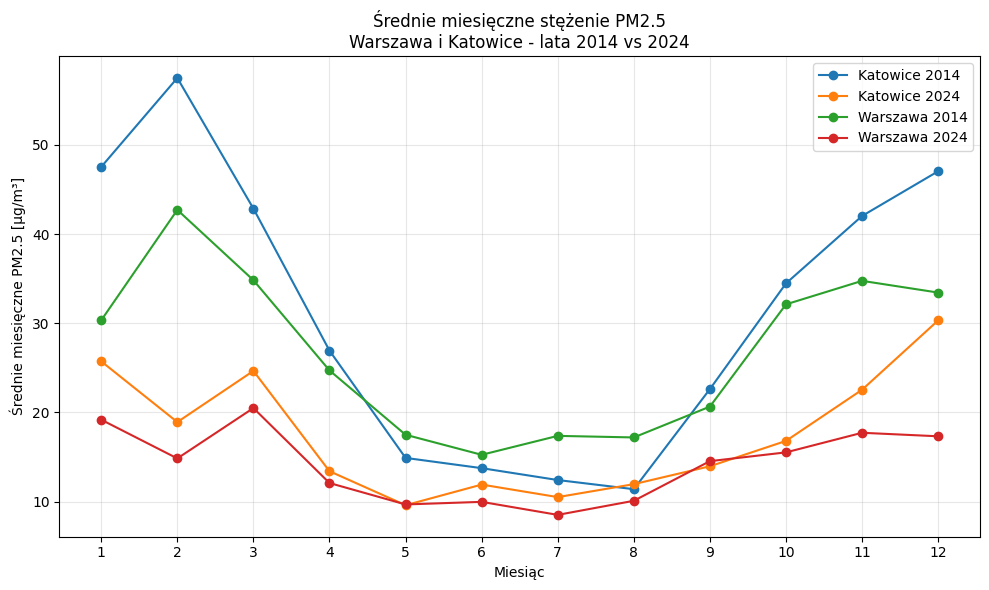

In [ ]:
# wykresy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for (miasto, rok), sub in plot_data.groupby(["Miasto", "Rok"]):
    sub = sub.sort_values("Miesiac")
    plt.plot(
        sub["Miesiac"],
        sub["PM25"],
        marker="o",
        label=f"{miasto} {rok}"
    )

plt.xlabel("Miesiąc")
plt.ylabel("Średnie miesięczne PM2.5 [µg/m³]")
plt.title("Średnie miesięczne stężenie PM2.5\nWarszawa i Katowice - lata 2014 vs 2024")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



### Obserwacje:
- Zarówno w Warszawie, jak i w Katowicach, w roku 2014 stężenia PM2.5 były zauważalnie wyższe niż w 2024.
- Największe różnice między 2014 a 2024 występują zimą (styczeń-luty oraz listopad-grudzień). To logiczne, bo zimą rośnie emisja z ogrzewania domów.
- Latem stężenie jest podobnie małe (jest małe zarówno w 2014 jak i 2024 roku, więc w tej kwestii nie pogorszyło się).
- Katowice w obu latach miały wyższe wartości, co można wytłumaczyć tym, że Katowice leżą blisko kopalni.
- W roku 2024 w obu miastach duża poprawa - być może dzięki wymianie pieców i większej świadomości problemu zanieczyszczeń w społeczeństwie.

# Zad. 3
## Heatmapa miesięcznych średnich

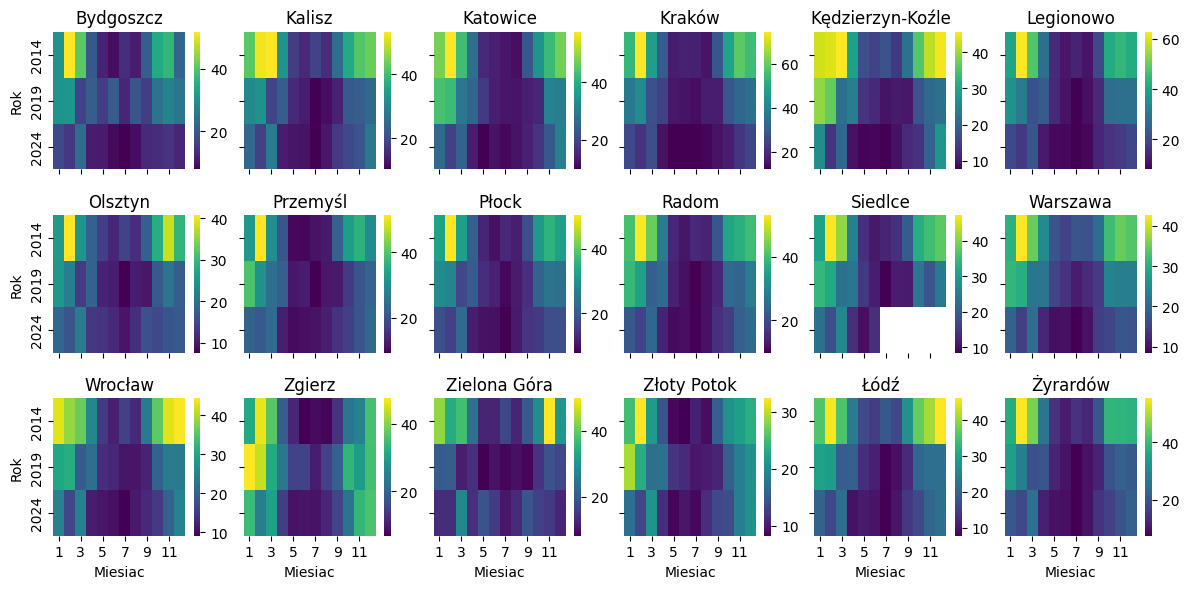

In [ ]:
import seaborn as sns


# tworzymy FacetGrid z podziałem na miasta
g = sns.FacetGrid(city_month, col="Miasto", col_wrap=6, height=2)

def draw_heatmap(data, **kwargs):
    miasto = data['Miasto'].iloc[0]

    # korekta danych na numeryczne
    df = data.copy()
    df['Miesiac'] = pd.to_numeric(df['Miesiac'])
    df['PM25'] = pd.to_numeric(df['PM25'])

    pivot = df.pivot_table(
        index='Rok',
        columns='Miesiac',
        values='PM25',
        aggfunc='mean'
    )

    sns.heatmap(pivot, cmap="viridis", **kwargs)
    plt.title(miasto)

# mapujemy heatmapy do paneli
g.map_dataframe(draw_heatmap)

plt.tight_layout()
plt.show()

### Interpretacja wyników:
- W większości miejscowości można zaobserwować stosunkowo podobne trendy (analogiczne do tych zaobserwowanych w zad. 2).
- W miesiącach zimowych występują najwyższe stężenia PM2.5 - prawdopodobnie powiązane z ogrzewaniem domów.
- W późniejszych latach są stabilnie niższe stężenia PM2.5 - potencjalnie związane z modernizacją systemów grzewczych i zaostrzeniem norm emisji.


# Zad. 4
## Dni z przekroczeniem normy (WHO)

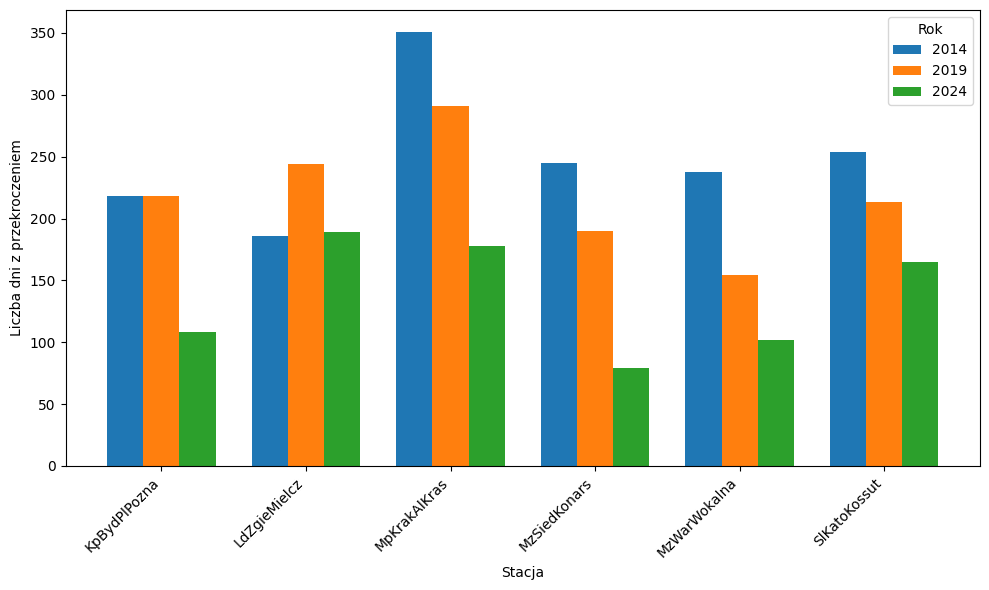

Rok,2014,2019,2024
Kod_stacji,,,
KpBydPlPozna,218,218,108
LdZgieMielcz,186,244,189
MpKrakAlKras,351,291,178
MzSiedKonars,245,190,79
MzWarWokalna,238,154,102
SlKatoKossut,254,213,165


In [ ]:
df = df_long.copy()
df['Data'] = df_long['Data'].dt.date

# obliczamy dzienną średnią dla każdej stacji
daily = df.groupby(['Kod_stacji','Rok','Data'])['PM25'].mean().reset_index()

# znajdujemy dni z przekroczeniem normy
daily['przekracza'] = daily['PM25'] > 15

counts = daily.groupby(['Kod_stacji','Rok'])['przekracza'].sum().reset_index()

# znajdujemy stacje z najwyższymi i najniższymi liczbami dni przekroczeń
top3 = counts[counts['Rok']==2024].nlargest(3,'przekracza')
bottom3 = counts[counts['Rok']==2024].nsmallest(3,'przekracza')

selected = pd.concat([top3,bottom3])['Kod_stacji'].unique()
plot_df = counts[counts['Kod_stacji'].isin(selected)]

pivot = plot_df.pivot(index='Kod_stacji', columns='Rok', values='przekracza')

fig, ax = plt.subplots(figsize=(10,6))
years = sorted(pivot.columns)
x = range(len(pivot.index))
bar_width=0.25

for i, year in enumerate(years):
    ax.bar([p + i*bar_width for p in x], pivot[year], width=bar_width, label=str(year))

ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(pivot.index, rotation=45, ha='right')
ax.set_ylabel("Liczba dni z przekroczeniem")
ax.set_xlabel("Stacja")
ax.legend(title="Rok")

plt.tight_layout()
plt.show()

pivot

### Opis i interpretacja:
##### Stacje o najniższych przekroczeniach w 2024 roku:
- KpBydPlPozna (Bydgoszcz)
- MzWarWokalna (Warszawa)
- MzSiedKonars (Siedlce)

Warszawa i Bydgoszcz wykazują silny spadek stężeń PM2.5 pomiędzy 2014 i 2024, aczkolwiek w Bydgoszczy cały spadek zaszedł pomiędzy 2019 a 2024.

Siedlce to przypadek szczególny - brakuje danych z drugiej połowy 2024, co prowadzi do drastycznego zaniżenia liczby dni z przekroczeniem normy.

##### Stacje o najwyższych przekroczeniach w 2024 roku:
- LdZgieMielcz (Zgierz)
- SlKatoKossut (Katowice)
- MpKrakAlKras (Kraków)

Kraków i Katowice mają stosunkowo wysokie stężenia PM2.5 (oraz liczby dni przekroczeń), ale wykazują stabilny spadek.

Zgierz odbiega od trendu - w 2019 stężenia wzrosły, a w 2024 nadal są powyżej wartości z 2014 (pomimo spadku). To sugeruje wpływ czynników lokalnych.
